# CAP 6629: Reinforcement Learning Fall 2023 Course project 1

In [72]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [73]:

# Define constants for the grid world
GRID_HEIGHT = 6
GRID_WIDTH = 6
START_STATE = (0, 0)
GOAL_STATE = (GRID_HEIGHT - 1, GRID_WIDTH - 1)
OBSTACLE_STATES = [(1, 2), (2, 3),(3,1) ,(3, 4), (4,1),(4, 4)]

# Define possible actions
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
NUM_ACTIONS = len(ACTIONS)

# Define rewards
REWARD_MOVE = -1
REWARD_GOAL = 10
REWARD_OBSTACLE = -100

# Q-learning parameters
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EXPLORATION_PROB = 0.2
NUM_EPISODES = 500
MAX_STEPS = 50
INTERMEDIATE_Q_TABLE_INTERVAL = 100  # Display Q-table every 100 episodes

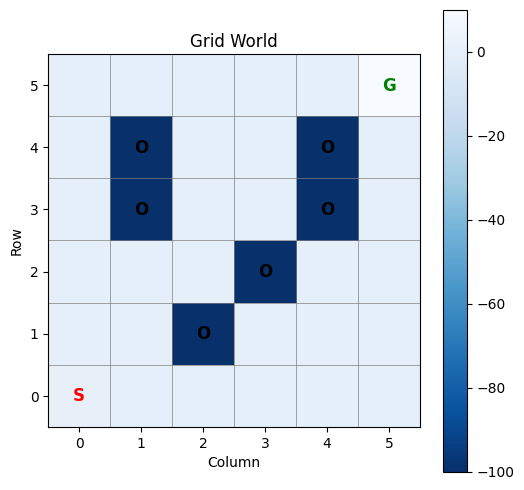

In [74]:

# Function to display the grid world
def display_grid():
    # Create the grid
    grid = np.zeros((GRID_HEIGHT, GRID_WIDTH))

    # Mark obstacles
    for obstacle in OBSTACLE_STATES:
        grid[obstacle] = -100

    # Mark start and goal
    grid[0, 0] = 1  # Start
    grid[GRID_HEIGHT - 1, GRID_WIDTH - 1] = 10  # Goal

    # Plot the 6x6 grid with lines and labels
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Blues_r', interpolation='none', origin='upper')

    # Plot vertical grid lines
    for i in range(GRID_WIDTH + 1):
        plt.axvline(i - 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Plot horizontal grid lines
    for i in range(GRID_HEIGHT + 1):
        plt.axhline(i - 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Add labels
    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            if grid[i, j] == 1:
                plt.text(j, i, 'S', ha='center', va='center', fontsize=12, fontweight='bold', color='red')
            elif grid[i, j] == 10:
                plt.text(j, i, 'G', ha='center', va='center', fontsize=12, fontweight='bold', color='green')
            elif grid[i, j] == -100:
                plt.text(j, i, 'O', ha='center', va='center', fontsize=12, fontweight='bold', color='black')

    plt.title('Grid World')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(range(GRID_WIDTH))
    plt.yticks(range(GRID_HEIGHT))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

# Display the grid world
display_grid()


In [75]:
# Mark the start, goal, and obstacles on the grid
grid = np.zeros((GRID_HEIGHT, GRID_WIDTH))
grid[START_STATE] = 1  # Start
grid[GOAL_STATE] = 10  # Goal
for obstacle in OBSTACLE_STATES:
    grid[obstacle] = -100  # Obstacles

# Define possible actions
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
NUM_ACTIONS = len(ACTIONS)

# Q-learning parameters
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
EXPLORATION_PROB = 0.2
NUM_EPISODES = 500
MAX_STEPS = 100



In [76]:

# Initialize the Q-table with zeros
q_table = np.zeros((GRID_HEIGHT, GRID_WIDTH, NUM_ACTIONS))

# Initialize the Q-table with zeros
q_table = np.zeros((GRID_HEIGHT, GRID_WIDTH, NUM_ACTIONS))

# Function to select an action using an epsilon-greedy strategy
def select_action(state, exploration_prob):
    if np.random.uniform(0, 1) < exploration_prob:
        return np.random.choice(NUM_ACTIONS)
    else:
        return np.argmax(q_table[state[0], state[1], :])


In [77]:

# Q-learning algorithm
def q_learning():
    step_to_go_curve = []
    sum_squared_error = []
    intermediate_q_tables = []

    for episode in range(NUM_EPISODES):
        state = START_STATE
        total_reward = 0

        for step in range(MAX_STEPS):
            action = select_action(state, EXPLORATION_PROB)

            # Perform the action and observe the new state and reward
            if ACTIONS[action] == 'UP':
                new_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                new_state = (min(state[0] + 1, GRID_HEIGHT - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                new_state = (state[0], max(state[1] - 1, 0))
            else:  # 'RIGHT'
                new_state = (state[0], min(state[1] + 1, GRID_WIDTH - 1))

            # Calculate the reward based on the new state
            if new_state == GOAL_STATE:
                reward = REWARD_GOAL
            elif new_state in OBSTACLE_STATES:
                reward = REWARD_OBSTACLE
            else:
                reward = REWARD_MOVE

            # Update the Q-table
            q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(q_table[new_state[0], new_state[1], :]) - q_table[state[0], state[1], action])

            total_reward += reward
            state = new_state

            # Check if reached the goal or obstacle
            if new_state == GOAL_STATE or new_state in OBSTACLE_STATES:
                break

        # Track metrics for visualization
        step_to_go_curve.append(step + 1)
        sum_squared_error.append(np.sum(np.square(q_table)))

        # Collect intermediate Q-tables
        if episode % INTERMEDIATE_Q_TABLE_INTERVAL == 0:
            intermediate_q_tables.append(q_table.copy())

    return step_to_go_curve, sum_squared_error, intermediate_q_tables

# Run Q-learning
step_to_go_curve, sum_squared_error, intermediate_q_tables = q_learning()


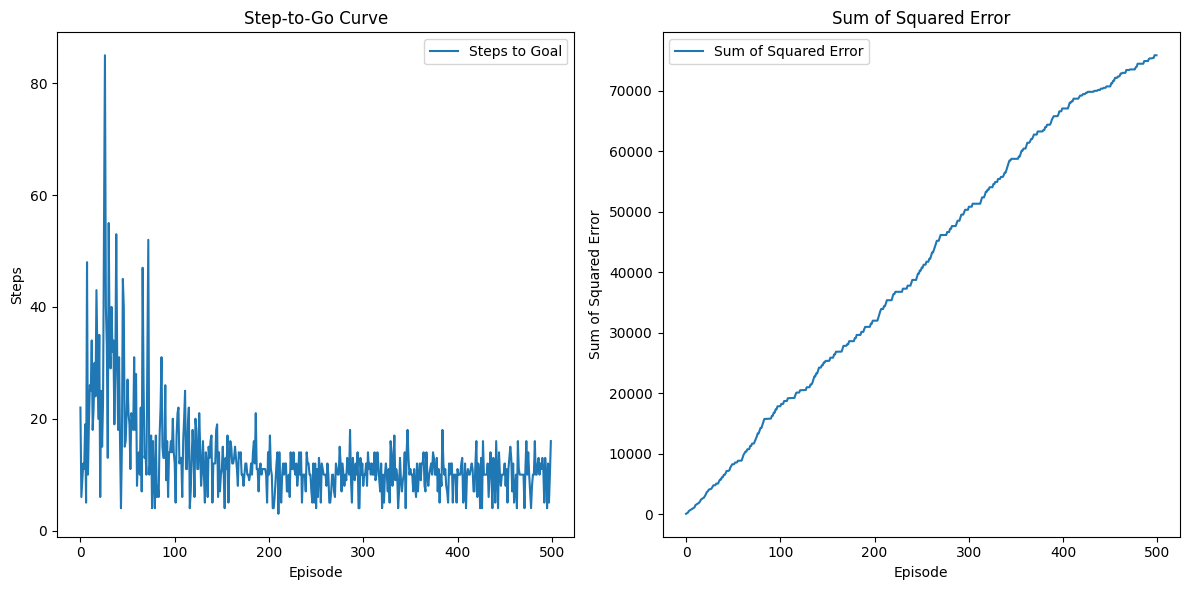

In [78]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot the step-to-go curve
plt.subplot(1, 2, 1)
plt.plot(step_to_go_curve, label='Steps to Goal')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Step-to-Go Curve')
plt.legend()

# Plot the sum of squared error
plt.subplot(1, 2, 2)
plt.plot(sum_squared_error, label='Sum of Squared Error')
plt.xlabel('Episode')
plt.ylabel('Sum of Squared Error')
plt.title('Sum of Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
# Display some intermediate Q-tables
intermediate_episodes = [10, 50, 100, 200]

for episode in intermediate_episodes:
    print(f"Q-table for Episode {episode}:")
    print(q_table)
    print()


Q-table for Episode 10:
[[[-3.33729151e+00 -2.25160137e+00 -3.56207971e+00 -3.83576488e+00]
  [-4.02733951e+00 -2.52683918e+00 -3.81661599e+00 -3.96438422e+00]
  [-3.42515400e+00 -6.12579511e+01 -3.40453981e+00 -3.36068733e+00]
  [-2.73299955e+00 -2.70900110e+00 -2.87539686e+00 -2.51162466e+00]
  [-2.13629727e+00 -2.07181166e+00 -2.10591775e+00 -1.17892987e+00]
  [-1.55791950e+00  7.91041190e-01 -1.87504524e+00 -1.49027411e+00]]

 [[-3.18606429e+00 -1.39066127e+00 -3.12219948e+00 -2.52977989e+00]
  [-3.72331704e+00 -5.33138886e-01 -3.39101956e+00 -7.17570464e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-2.19277241e+00 -3.43900000e+01 -3.43900000e+01 -1.97204490e+00]
  [-1.76117465e+00 -1.58167854e+00 -1.72877752e+00 -7.73341977e-02]
  [-1.48189524e+00  3.09307038e+00 -1.30923975e+00 -1.01479530e+00]]

 [[-2.78169567e+00 -3.54738386e+00 -1.77512305e+00 -4.34064887e-01]
  [-2.14594924e+00 -9.65663162e+01 -2.08199806e+00  6.28818581e-01]
  [-8.90581011e+01  

/var/folders/wl/18x4mj3j3tv5xnj0cbgz9c9r0000gn/T/ipykernel_4659/1680547290.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_snapshots, i + 1)


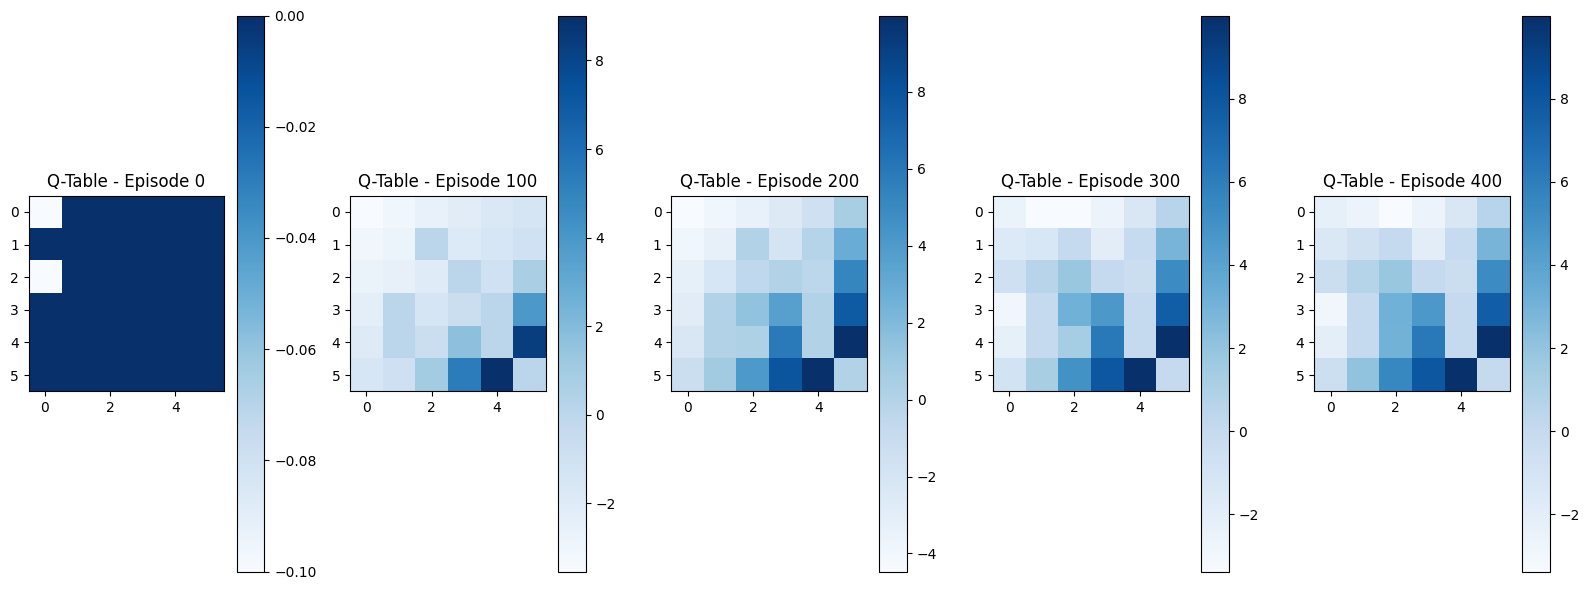

In [80]:
# Plot results
plt.figure(figsize=(16, 6))

# Plot the step-to-go curve
plt.subplot(1, 3, 1)
plt.plot(step_to_go_curve, label='Steps to Goal')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Step-to-Go Curve')
plt.legend()

# Plot the sum of squared error
plt.subplot(1, 3, 2)
plt.plot(sum_squared_error, label='Sum of Squared Error')
plt.xlabel('Episode')
plt.ylabel('Sum of Squared Error')
plt.title('Sum of Squared Error')
plt.legend()

# Plot intermediate Q-tables
plt.subplot(1, 3, 3)
num_snapshots = len(intermediate_q_tables)
for i in range(num_snapshots):
    plt.subplot(1, num_snapshots, i + 1)
    plt.imshow(np.max(intermediate_q_tables[i], axis=2), cmap='Blues', interpolation='none')
    plt.colorbar()
    plt.title(f'Q-Table - Episode {i * INTERMEDIATE_Q_TABLE_INTERVAL}')

plt.tight_layout()
plt.show()

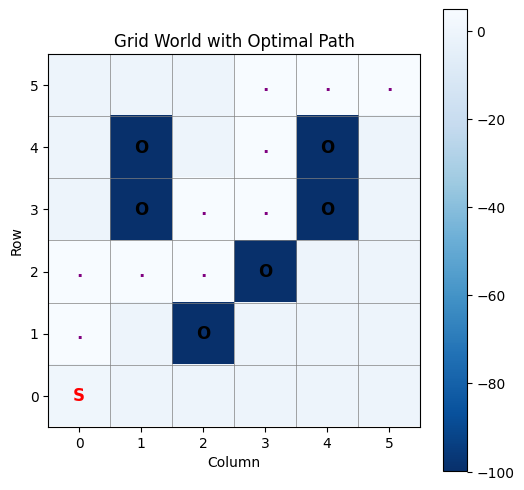

In [81]:
# Function to display the grid world with the optimal path
def display_grid_with_path(q_table):
    # Create the grid
    grid = np.zeros((GRID_HEIGHT, GRID_WIDTH))

    # Mark obstacles
    for obstacle in OBSTACLE_STATES:
        grid[obstacle] = -100

    # Mark start and goal
    grid[0, 0] = 1  # Start
    grid[GRID_HEIGHT - 1, GRID_WIDTH - 1] = 10  # Goal

    # Find the optimal path based on the Q-table
    state = (0, 0)
    while state != (GRID_HEIGHT - 1, GRID_WIDTH - 1):
        action = np.argmax(q_table[state[0], state[1], :])
        if ACTIONS[action] == 'UP':
            state = (max(state[0] - 1, 0), state[1])
        elif ACTIONS[action] == 'DOWN':
            state = (min(state[0] + 1, GRID_HEIGHT - 1), state[1])
        elif ACTIONS[action] == 'LEFT':
            state = (state[0], max(state[1] - 1, 0))
        else:  # 'RIGHT'
            state = (state[0], min(state[1] + 1, GRID_WIDTH - 1))
        grid[state] = 5  # Mark the path with a different value

    # Plot the 6x6 grid with lines and labels
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Blues_r', interpolation='none', origin='upper')

    # Plot vertical grid lines
    for i in range(GRID_WIDTH + 1):
        plt.axvline(i - 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Plot horizontal grid lines
    for i in range(GRID_HEIGHT + 1):
        plt.axhline(i - 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Add labels
    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            if grid[i, j] == 1:
                plt.text(j, i, 'S', ha='center', va='center', fontsize=12, fontweight='bold', color='red')
            elif grid[i, j] == 10:
                plt.text(j, i, 'G', ha='center', va='center', fontsize=12, fontweight='bold', color='green')
            elif grid[i, j] == -100:
                plt.text(j, i, 'O', ha='center', va='center', fontsize=12, fontweight='bold', color='black')
            elif grid[i, j] == 5:
                plt.text(j, i, '.', ha='center', va='center', fontsize=12, fontweight='bold', color='purple')

    plt.title('Grid World with Optimal Path')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(range(GRID_WIDTH))
    plt.yticks(range(GRID_HEIGHT))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

# Display the grid world with the optimal path
display_grid_with_path(q_table)
